In [94]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf


In [95]:
data = pd.read_csv('data/damping_with_evals.csv')
data.head()


,Unnamed: 0,position,shallow_eval,shuffling,non_pawn_material,pawns,deep_eval
0,0,b1kr3r/p1pp1pbp/1pn1pq2/6p1/3PP3/1PN2N1P/P1P1Q...,-270,3,14998,16,-17
1,1,r2q1rk1/1b2bppp/pp6/n1p1N3/P3nB2/2P4P/BP3PP1/R...,-449,1,16604,12,92
2,2,r3k2r/1bq1bppp/pp1p1n2/n1p1p3/P3P2P/2PPBN2/BP1...,-207,0,16604,16,-10
3,3,r1b1kr2/pp4bp/1np2pp1/8/1P6/P3PN2/BB3PPP/3R1RK...,476,5,9966,12,237
4,4,r1b1k2r/1p1pbppp/p3p1n1/q1pP4/2P5/B1N5/P3BPPP/...,1029,2,15042,14,-520


In [96]:
# Data wrangling
data.drop(data.loc[(data.shallow_eval == 0) & (data.deep_eval == 0)].index, inplace=True)
data['damping_ratio'] = data.deep_eval / data.shallow_eval
data.damping_ratio = data.damping_ratio.clip(lower=-2, upper=2)


In [97]:
data.describe()


,Unnamed: 0,shallow_eval,shuffling,non_pawn_material,pawns,deep_eval,damping_ratio
count,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000
mean,7602.635207,190.186638,3.959703,1415.512195,4.316013,58.698834,0.020473
std,3812.646387,1288.077977,9.289658,641.147938,3.138662,1526.854813,0.663738
min,247.000000,-3416.000000,0.000000,0.000000,0.000000,-31999.000000,-2.000000
25%,4503.500000,-472.500000,0.000000,825.000000,2.000000,-116.000000,-0.287888
50%,7662.000000,22.000000,1.000000,1606.000000,4.000000,8.000000,0.036866
75%,10879.000000,1053.000000,3.000000,2057.000000,7.000000,407.500000,0.307177
max,14576.000000,4043.000000,97.000000,2431.000000,14.000000,31999.000000,2.000000


<Axes: >

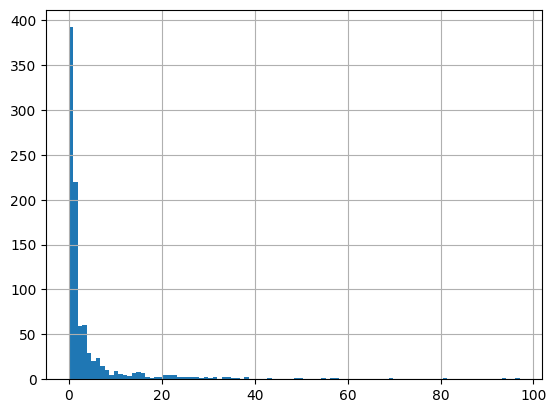

In [98]:
# Make a chart of the distribution of shuffling values
data['shuffling'].hist(bins=100)


<Axes: xlabel='shuffling', ylabel='value'>

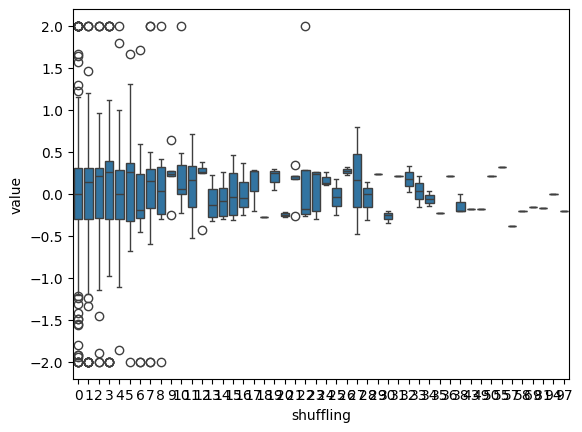

In [99]:
# Box and whisker plot of damping_ratio per shuffling values
boxplot_df = data.melt(
    id_vars=["shuffling"], value_vars=["damping_ratio"]
)

sns.boxplot(x="shuffling", y="value", data=boxplot_df)


In [100]:
# Fit a linear model to the data
results = smf.ols('damping_ratio ~ shuffling + non_pawn_material + shuffling*non_pawn_material', data=data).fit()
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:          damping_ratio   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.5083
Date:                Sat, 02 Dec 2023   Prob (F-statistic):              0.677
Time:                        12:18:56   Log-Likelihood:                -950.29
No. Observations:                 943   AIC:                             1909.
Df Residuals:                     939   BIC:                             1928.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         